In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
def targetfunc(x):
    return 3*x + 5

# """
# 아까 만들었던 직선 우리가 기준으로 정하는 직선
# 이 라인을 기준으로 랜덤 데이터를 만들것이다.
# """

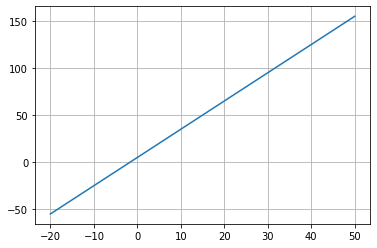

In [4]:
x = np.linspace(-20, 50, 50)
#-20 에서 50까지 50개를 생성해라
fx = targetfunc(x)
#이 x에 대한 fx 값을 구해라
#print(x)
plt.plot(x,fx)
#x 와 fx가 다 들어가 있다. 우리는 이 fx에 랜덤 값을 넣을 것이다.
plt.grid()
plt.show()

[0.01936696 0.67883553 0.21162812 0.26554666 0.49157316 0.05336255
 0.57411761 0.14672857 0.58930554 0.69975836 0.10233443 0.41405599
 0.69440016 0.41417927 0.04995346 0.53589641 0.66379465 0.51488911
 0.94459476 0.58655504 0.90340192 0.1374747  0.13927635 0.80739129
 0.39767684 0.1653542  0.92750858 0.34776586 0.7508121  0.72599799
 0.88330609 0.62367221 0.75094243 0.34889834 0.26992789 0.89588622
 0.42809119 0.96484005 0.6634415  0.62169572 0.11474597 0.94948926
 0.44991213 0.57838961 0.4081368  0.23702698 0.90337952 0.57367949
 0.00287033 0.61714491]


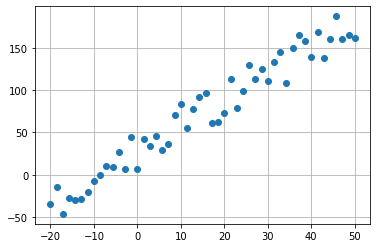

In [9]:
np.random.seed(1) # random 값이 일정하게 나오기 위해서 시드를 고정 시켜준것이다.
t = fx + 50 * np.random.rand(len(x)) # 랜덤 y   값 => len은 x의 객수 만큼 random 하게 만들어준다는 것이다.

print(np.random.rand(len(x)))
plt.plot(x,t,"o")
plt.grid()
plt.show()

In [19]:
# loss function, gradient function , gradient_descent function 구현

def grad_loss(x, t, w0, w1):
    y = w0 * x + w1
    grad_w0 = 2 * np.mean((y-t)*x)
    grad_w1 = 2 * np.mean(y - t)
    return grad_w0, grad_w1

# """
# x는 위에서 구한 x 값 
# t는 위에서 구한 참값 동그라미 점
# w0, w1는 우리가 구해야하는 값 
# 이 함수는 gradient J 를 구해주는 함수이다.
# """

def grad_descent(x, t, w0, w1, lr, itr):
    _w0 = w0
    _w1 = w1
    eps = 0.1
    for i in range(1, itr):
        grad_w = grad_loss(x,t,_w0, _w1)
        _w0 = _w0 - lr*grad_w[0]
        _w1 = _w1 - lr*grad_w[1]
        if (max(np.absolute(grad_w)) < eps):
            break
    return _w0, _w1

# """
#  이것은 그레디언트 값 이용해서 최소값을 찾아가는 것
 
#  lr은 우리가 이전 시간에 봤던 alpha. 즉 런닝메이트
#  이것을 크게 하면 크게 할 수록 이동하는 양이 많다. 
 
#  itr은 우리가 반복하는 횟수를 의미하고 최저값에 가까우면 끝나게 된다.
# """

def show_line(x,t,w0,w1):
    #true - dot
    plt.plot(x,t, "o") # 참 값은 0 으로 표시하고
    #model - line
    y = w0*x + w1 # 우리가 구한 값은 선을 그린다.
    plt.plot(x,y, color="red", linewidth = 4)

W = 3.285,  19.581


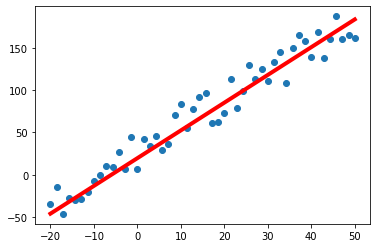

In [20]:
w0 = 1.0
w1 = 1.0

lr = 0.001
itr = 1000
# """
# 이 윗 것이 초기화 이니 런닝 메이트로 내려간다. 몇번? 천번
# """
w0_opt, w1_opt = grad_descent(x,t,w0,w1, lr, itr)
print("W = {0:.3f}, {1: 0.3f}".format(w0_opt, w1_opt))
show_line(x,t,w0_opt, w1_opt)

# """
# 이것이 있으면 우리가 x 값을 주면 y 값을 예측 할 수 있게 됩니다.
# => 선형 회귀 라 한다.
# """